# Base VAE

In [10]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import pytorch_lightning as pl

import matplotlib.pyplot as plt
import numpy as np

import pmldiku
from pmldiku import data, vae, model_utils

%load_ext autoreload
%autoreload 1
%aimport pmldiku.data, pmldiku.vae, pmldiku.model_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
torch.manual_seed(1)

cuda = True
batch_size = 128
epochs = 16
device_name = "cuda" if cuda else "cpu"

device = torch.device(device_name)
kwargs = {'num_workers': 4, 'pin_memory': device} 

In [12]:
# Val equals test here :)
train_loader = data.load_mnist(train=True).setup_data_loader(batch_size=batch_size, **kwargs)
val_loader = data.load_mnist(train=False).setup_data_loader(batch_size=batch_size, **kwargs)  

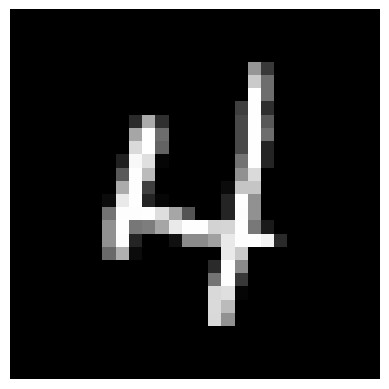

In [13]:
X, y = next(iter(train_loader))
img = X[0].squeeze().numpy()
model_utils.plot_img(img)

# Train model

In [5]:
base_vae = vae.BaseVAE()
model = vae.LitVAE(vae=base_vae)
loss_callback = vae.VAELossCallback()
reconstruct_cb = vae.VAEImageReconstructionCallback(epochs)
callbacks = [loss_callback, reconstruct_cb]
trainer = pl.Trainer(max_epochs=epochs, devices=1, accelerator=device_name, callbacks=callbacks)
trainer.fit(model=model, train_dataloaders=train_loader, val_dataloaders=val_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name     | Type    | Params
-------------------------------------
0 | base_vae | BaseVAE | 709 K 
-------------------------------------
709 K     Trainable params
0         Non-trainable params
709 K     Total params
2.838     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=16` reached.


array([69682.5703125 , 21113.92773438, 20024.66601562, 19594.67773438,
       19271.69921875, 19061.44726562, 18886.69726562, 18755.33203125,
       18659.3046875 , 18574.734375  , 18475.78515625, 18452.37890625,
       18440.65625   , 18366.890625  , 18269.03515625, 18237.01367188,
       18239.35742188])

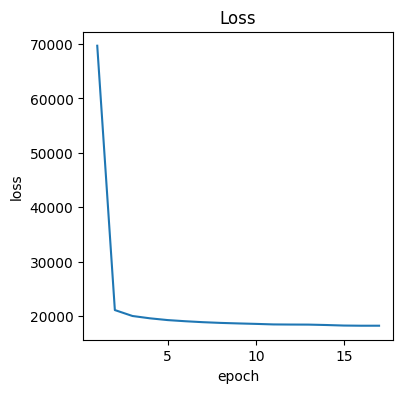

In [6]:
losses = np.array(loss_callback.val_loss)
model_utils.plot_loss(losses)
losses

# Reconstruction of model for each epoch of training

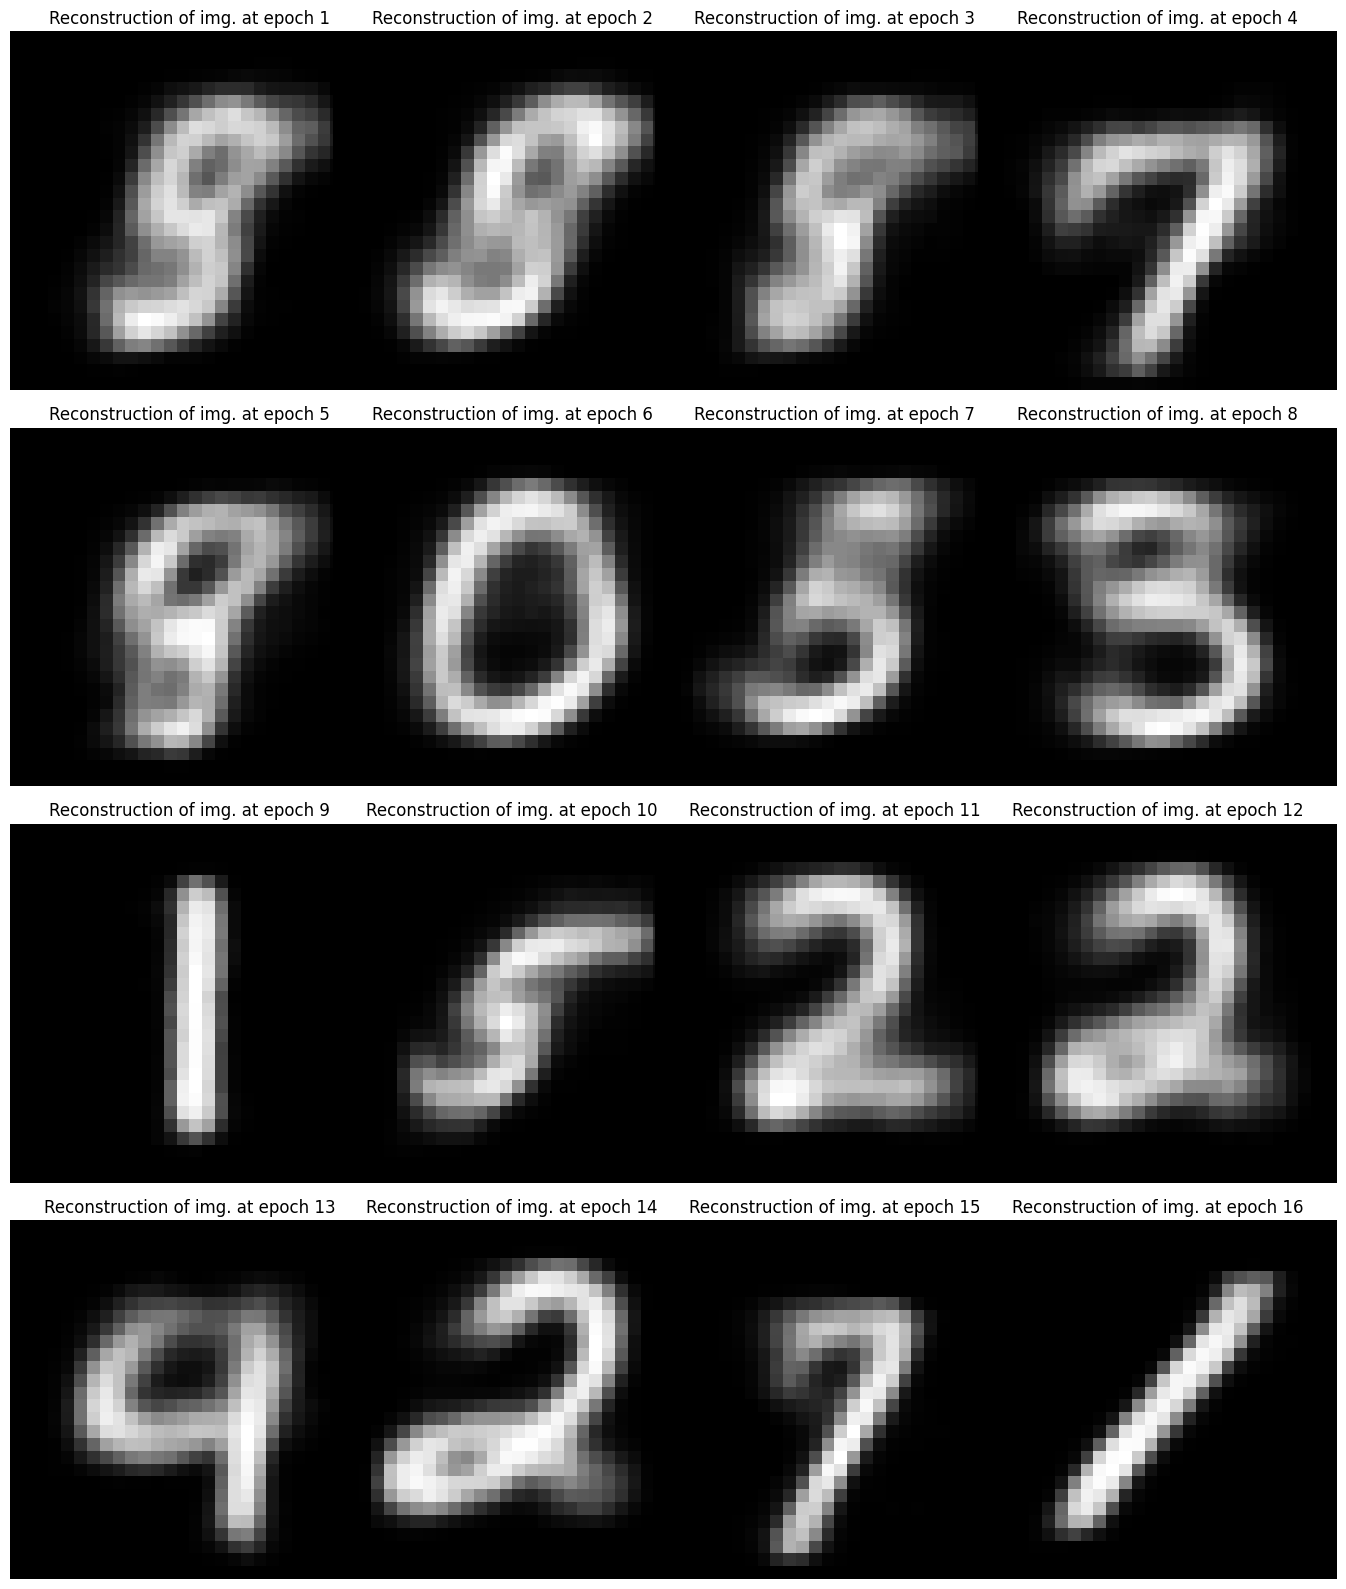

In [7]:
# Take first image of each batch of reconstructed images
images = reconstruct_cb.samples[:, 0, :, :]
model_utils.plot_image_reconstruction(images, num_cols=4, slim=20)

# Expected value in latent space for each number

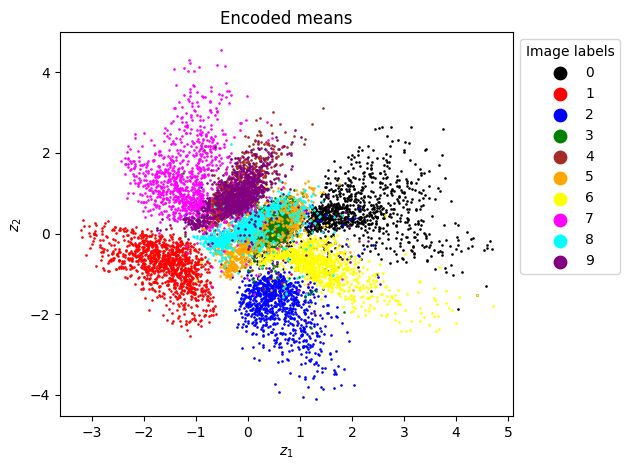

In [8]:
means_plot, labels = vae.encode_means(model.vae, val_loader)
plot_args = dict(title="Encoded means", xlabel=r"$z_1$", ylabel=r"$z_2$")
model_utils.plot_encoded(means_plot, labels, **plot_args)

# Reconstruction of equally spaced gaussian noise

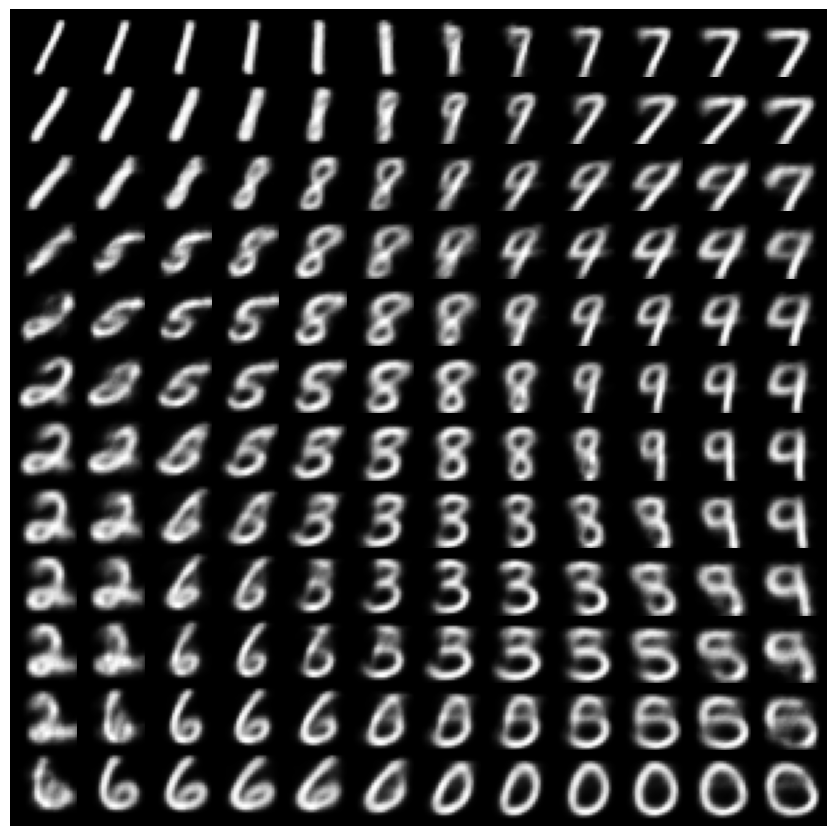

In [9]:
gauss_vals = model_utils.construct_gauss_grid(M=12)
decoded_imgs = model.vae.decode(gauss_vals).detach().numpy()
model_utils.plot_gauss_grid_imgs(decoded_imgs)